## Naive Bayes - Salary Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing training and test dataset 

In [2]:
salary_train = pd.read_csv("SalaryData_train.csv") #training dataset
salary_test = pd.read_csv("SalaryData_test.csv") # testing dataset

In [3]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

No Null values in training dataset

In [4]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


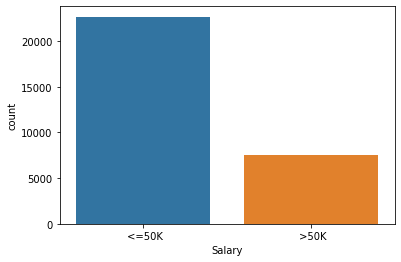

In [5]:
sns.countplot(data=salary_train,x='Salary')

#### We see that dataset is imbalanced with respect to salary, lets futher see what categories of people are drawing what type of salary

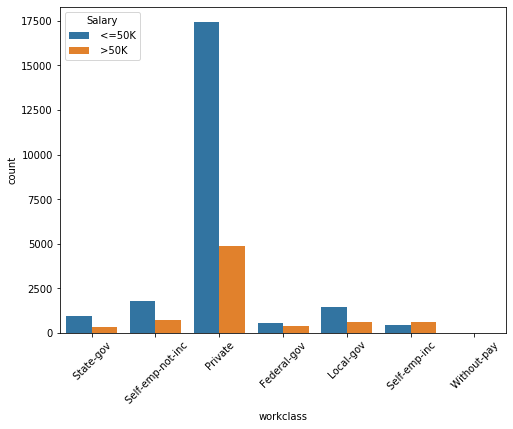

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(data=salary_train,x='workclass',hue='Salary')
plt.xticks(rotation=45);

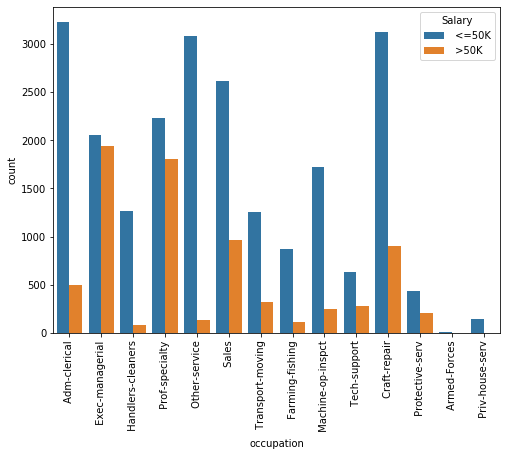

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(data=salary_train,x='occupation',hue='Salary')
plt.xticks(rotation=90);

#### We see that "Exec-managerial" and "Prof-speciality" category people are earning above 50k salary whereas "Armed-Forces" are earning below 50k salary 

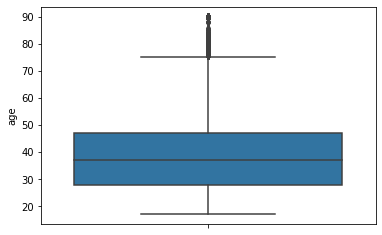

In [7]:
sns.boxplot(data= salary_train,y='age')

#### People between age group 25 to 50 are potential earners and very few people of age above 75 are earning/working.

### Let us now create a model by creating X and Y data by converting categorical variables to dummy variables

In [8]:
X_train = salary_train.drop(['Salary'],axis=1)
y_train = salary_train["Salary"]

In [9]:
X_train = pd.get_dummies(X_train,drop_first=True)

In [10]:
X_test = pd.get_dummies(salary_test.drop(['Salary'],axis=1),drop_first=True)
y_test = salary_test['Salary']

In [11]:
X_test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB

#### Creating Gaussian Naive bayes model

In [13]:
gnb = GaussianNB()

In [14]:
gnb.fit(X_train,y_train)

GaussianNB()

In [15]:
pred = gnb.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       <=50K       0.91      0.85      0.88     11360
        >50K       0.62      0.73      0.67      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.79      0.77     15060
weighted avg       0.83      0.82      0.83     15060



#### We see that Gaussian model has accuracy of 0.82 and very good parameter(f1-score) for predicting salary range below 50k.
#### Let us now plot confusion matrix

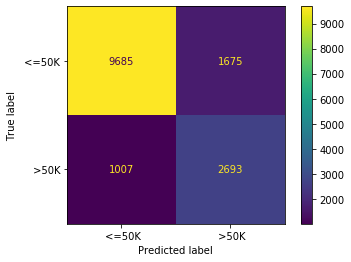

In [18]:
plot_confusion_matrix(gnb,X_test,y_test)

### Lets create Multinomial Naive Bayes model

In [19]:
mnb =MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [20]:
pred = mnb.predict(X_test)

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     11360
        >50K       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



#### Accuracy score is droped compared to gaussian model
#### Lets plot confusion matrix

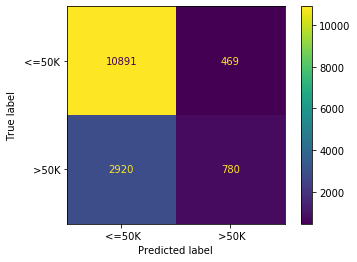

In [22]:
plot_confusion_matrix(mnb,X_test,y_test)

#### From Above two model we can say that Gaussian Model has good prediction compared to Multinomial model